In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/train.csv")

In [3]:
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_used
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [4]:
df[['day', 'month', 'year']] = df['week'].str.split("/", expand=True)

In [5]:
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_used,day,month,year
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [6]:
df = df.drop('week', axis=1)

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X, y = df.drop('units_used', axis = 1), df['units_used'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = RandomForestRegressor(n_jobs = -1)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
model.score(X_test, y_test)

0.7762221789158998

In [10]:
from sklearn.metrics import root_mean_squared_error

y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_pred, y_test)
rmse

27.096923499176306

In [11]:
df.units_used.describe()

count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_used, dtype: float64

<Axes: >

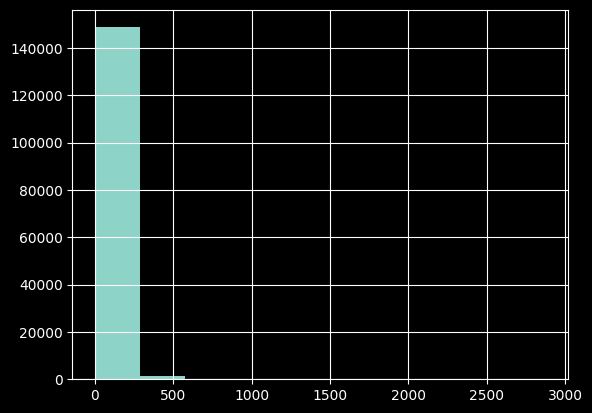

In [12]:
df.units_used.hist()

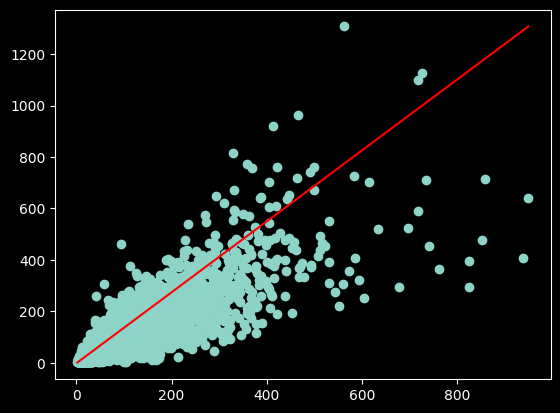

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(),y_test.max()), color = 'red')

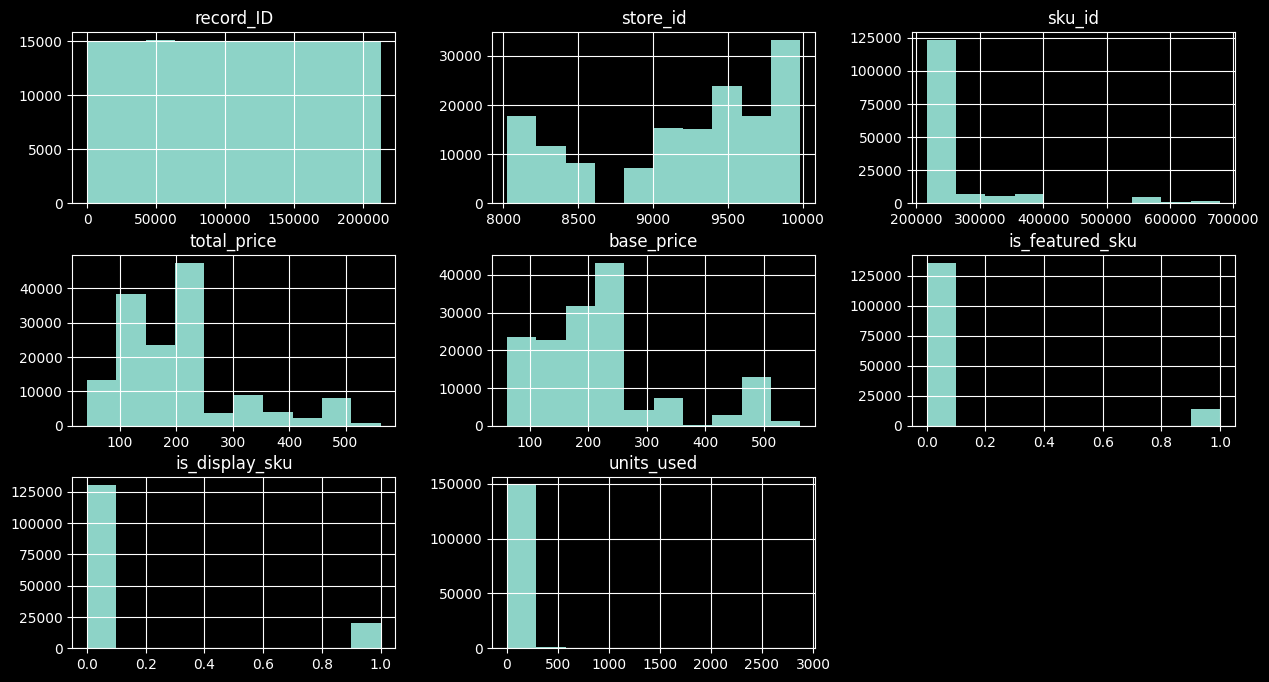

In [14]:
df.hist(figsize=(15,8))
plt.show()

In [ ]:
df = df.drop('record_ID', axis = 1)

In [16]:
len(df.store_id.unique())

76

In [17]:
len(df.sku_id.unique())

28

In [18]:
df = df[df.units_used < df.units_used.quantile(0.99)]

In [19]:
df

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_used,day,month,year
0,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,9984,547934,141.7875,191.6625,0,1,12,09,07,13


<Axes: >

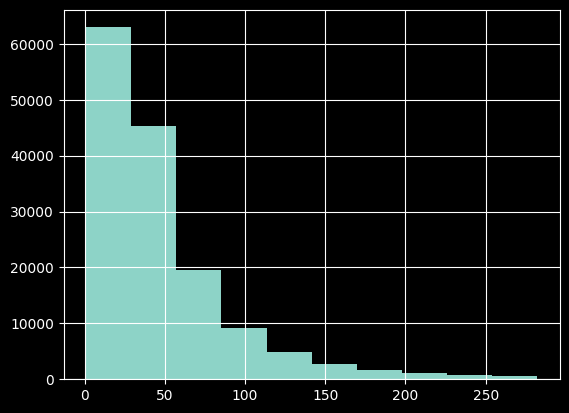

In [20]:
df.units_used.hist()

In [ ]:
df = df.join(pd.get_dummies(df.store_id, prefix='store')).drop('store_id', axis=1)  
df = df.join(pd.get_dummies(df.sku_id, prefix='item')).drop('sku_id', axis=1)

In [22]:
df

,total_price,base_price,is_featured_sku,is_display_sku,units_used,day,month,year,store_8023,store_8058,...,item_320485,item_327492,item_378934,item_398721,item_545621,item_546789,item_547934,item_600934,item_673209,item_679023
0,99.0375,111.8625,0,0,20,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
1,99.0375,99.0375,0,0,28,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
2,133.9500,133.9500,0,0,19,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
3,133.9500,133.9500,0,0,44,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
4,141.0750,141.0750,0,0,52,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,235.8375,235.8375,0,0,38,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150146,235.8375,235.8375,0,0,30,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150147,357.6750,483.7875,1,1,31,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150148,141.7875,191.6625,0,1,12,09,07,13,False,False,...,False,False,False,False,False,False,True,False,False,False


In [23]:
model = RandomForestRegressor(n_jobs=-1)

X, y = df.drop('units_used', axis = 1), df['units_used'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
model.score(X_test, y_test)

0.8268475602622077

In [26]:
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_pred, y_test)

rmse

17.762451661596256

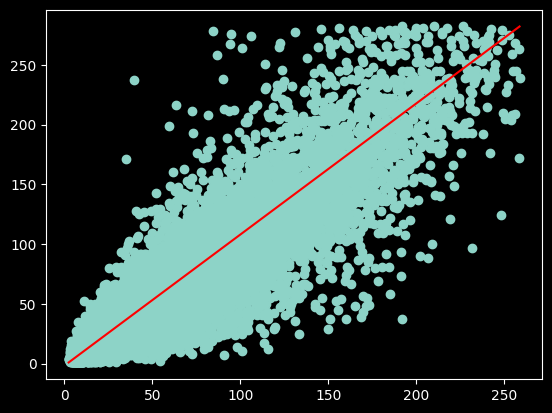

In [27]:

plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(),y_test.max()), color = 'red')

In [28]:
from sklearn.model_selection import GridSearchCV

params_grid = {
    'n_estimators' : [100, 150, 200],
    'min_samples_split' : [2, 3],
}

model = RandomForestRegressor(n_jobs=-1)
grid_search = GridSearchCV(model, params_grid, verbose=2, cv =3)

grid_search.fit(X_train,  y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ..............min_samples_split=2, n_estimators=100; total time=  11.3s
[CV] END ..............min_samples_split=2, n_estimators=100; total time=   9.8s
[CV] END ..............min_samples_split=2, n_estimators=100; total time=   9.4s
[CV] END ..............min_samples_split=2, n_estimators=150; total time=  15.8s
[CV] END ..............min_samples_split=2, n_estimators=150; total time=  16.0s
[CV] END ..............min_samples_split=2, n_estimators=150; total time=  27.2s
[CV] END ..............min_samples_split=2, n_estimators=200; total time=  55.4s
[CV] END ..............min_samples_split=2, n_estimators=200; total time=  47.7s
[CV] END ..............min_samples_split=2, n_estimators=200; total time=  21.6s
[CV] END ..............min_samples_split=3, n_estimators=100; total time=   9.9s
[CV] END ..............min_samples_split=3, n_estimators=100; total time=   9.7s
[CV] END ..............min_samples_split=3, n_est

,estimator,RandomForestR...sor(n_jobs=-1)
,param_grid,"{'min_samples_split': [2, 3], 'n_estimators': [100, 150, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [29]:
best_model = grid_search.best_estimator_

In [30]:
grid_search.best_params_

{'min_samples_split': 3, 'n_estimators': 200}

In [31]:
best_model.score(X_test, y_test)

0.8267781729844245

In [40]:
best_model.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,3
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [41]:
import pickle

filename = 'demand_forecast_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)

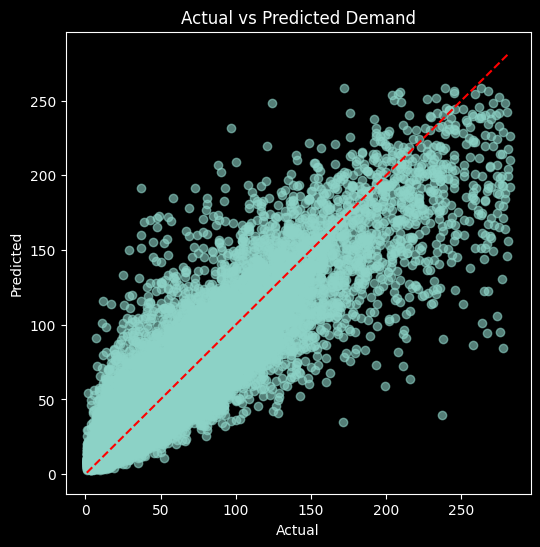

In [33]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Demand")
plt.show()

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

Model Performance:
MAE: 11.27
RMSE: 17.76
R²: 0.83


In [35]:
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns  # if X_train is a DataFrame

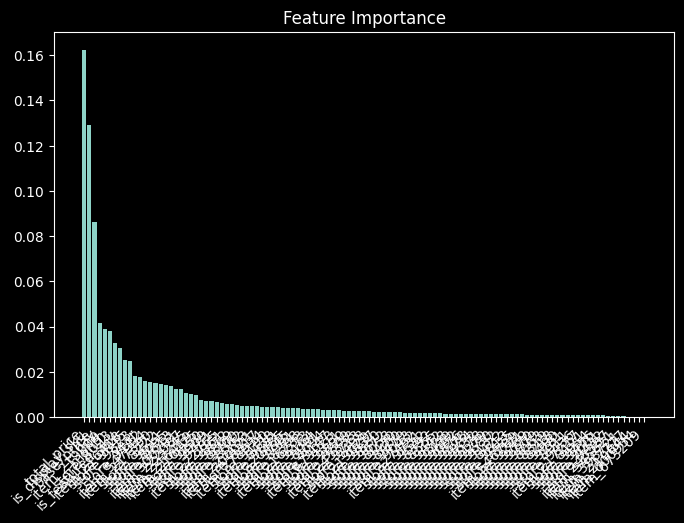

In [36]:
plt.figure(figsize=(8,5))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=45, ha='right')
plt.title("Feature Importance")
plt.show()